# 주식:채권 혼합 전략  p146
- 투자기간 : 2001년 1월 ~2017년 6월
- 투자자산 : 미국 S&P500SPY, 미국 3년 만기 국채SHY, 10년 만기 국채IEF, 20년 만기 국채TLT
- 매수원칙 : S&P500지수와 미국 국채를 1:1 비율로 나누어 투자
- 매도원칙 : 매월말 리밸런싱

그림 2-15 10년 7.3%/-23.1% 20년 8.4%/-22.2%

In [1]:
from settings import *

In [2]:
tickers = ['SPY', 'SHY', 'IEF', 'TLT']
read_df = yf.download(tickers)['Adj Close']
read_df.info()

[*********************100%***********************]  4 of 4 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7293 entries, 1993-01-29 to 2022-01-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IEF     4900 non-null   float64
 1   SHY     4900 non-null   float64
 2   SPY     7293 non-null   float64
 3   TLT     4900 non-null   float64
dtypes: float64(4)
memory usage: 284.9 KB


In [3]:
for c in read_df.columns:
    print(c, read_df[c].first_valid_index())

IEF 2002-07-30 00:00:00
SHY 2002-07-30 00:00:00
SPY 1993-01-29 00:00:00
TLT 2002-07-30 00:00:00


In [4]:
data = read_df['2002-7-30':].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4900 entries, 2002-07-30 to 2022-01-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IEF     4900 non-null   float64
 1   SHY     4900 non-null   float64
 2   SPY     4900 non-null   float64
 3   TLT     4900 non-null   float64
dtypes: float64(4)
memory usage: 191.4 KB


In [5]:
주식채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)

In [6]:
bt_spy = long_only_ew(data, ['SPY'], 'SPY', initial_capital=100000000)
bt_shy = long_only_ew(data, ['SHY'], 'SHY', initial_capital=100000000)
bt_ief = long_only_ew(data, ['IEF'], 'IEF', initial_capital=100000000)
bt_tlt = long_only_ew(data, ['TLT'], 'TLT', initial_capital=100000000)

In [7]:
r_assets = bt.run(bt_spy, bt_shy, bt_ief, bt_tlt)

2002-07-30 00:00:00
2002-07-30 00:00:00
2002-07-30 00:00:00
2002-07-30 00:00:00


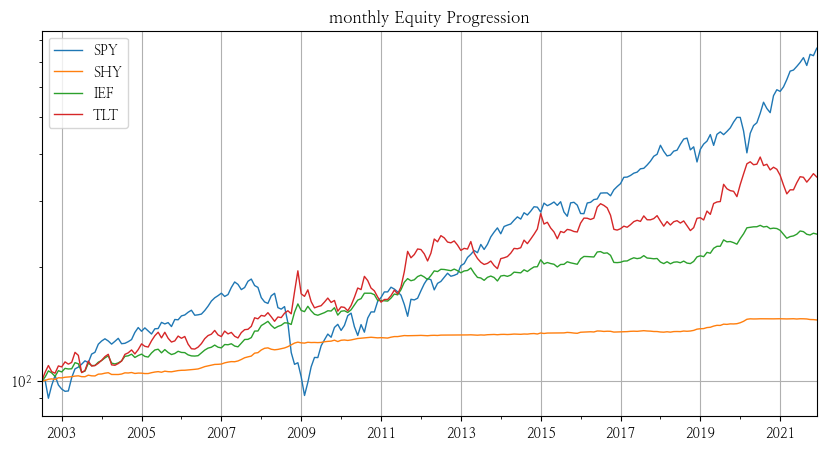

In [9]:
r_assets.plot(freq='M', logy=True, figsize=(10,5));

In [10]:
bt_spy_shy = bt.Backtest(주식채권혼합전략, data[['SPY', 'SHY']], name='3년혼합', initial_capital=100000000)
bt_spy_ief = bt.Backtest(주식채권혼합전략, data[['SPY', 'IEF']], name='10년혼합', initial_capital=100000000)
bt_spy_tlt = bt.Backtest(주식채권혼합전략, data[['SPY', 'TLT']], name='20년혼합', initial_capital=100000000)
r_all = bt.run(bt_spy_shy, bt_spy_ief, bt_spy_tlt, bt_spy)

2002-07-30 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-31 00:00:00
2003-01-31 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-31 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-28 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-31 00:00:00
2005-01-31 00:00:00
2005-02-28 00:00:00
2005-03-31 00:00:00
2005-04-29 00:00:00
2005-05-31 00:00:00
2005-06-30 00:00:00
2005-07-29 00:00:00
2005-08-31 00:00:00
2005-09-30 00:00:00
2005-10-31 00:00:00
2005-11-30 00:00:00
2005-12-30 00:00:00
2006-01-31 00:00:00
2006-02-28 00:00:00
2006-03-31 00:00:00
2006-04-28 00:00:00
2006-05-31 00:00:00
2006-06-30 00:00:00
2006-07-31 00:00:00


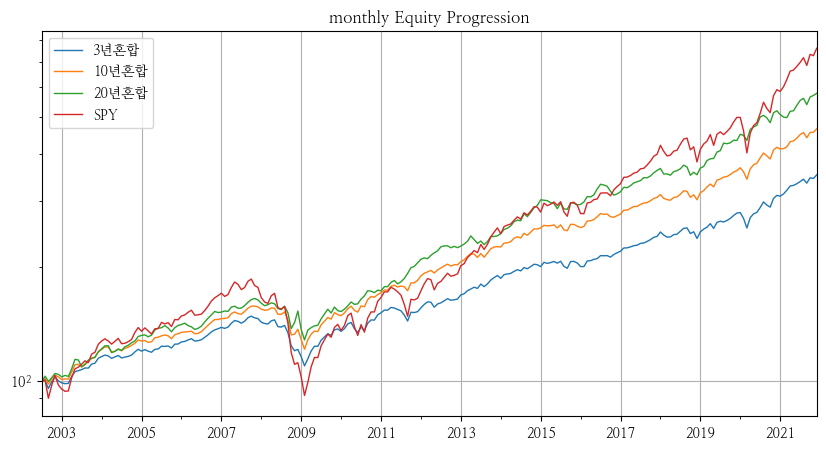

In [12]:
r_all.plot(freq='M', logy=True, figsize=(10,5));

In [13]:
r_all.display()

Stat                 3년혼합     10년혼합    20년혼합    SPY
-------------------  ----------  ----------  ----------  ----------
Start                2002-07-29  2002-07-29  2002-07-29  2002-07-29
End                  2022-01-12  2022-01-12  2022-01-12  2022-01-12
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         250.17%     361.51%     469.07%     655.12%
Daily Sharpe         0.75        0.97        1.03        0.64
Daily Sortino        1.17        1.54        1.68        1.00
CAGR                 6.65%       8.18%       9.35%       10.95%
Max Drawdown         -29.25%     -26.12%     -24.67%     -55.19%
Calmar Ratio         0.23        0.31        0.38        0.20

MTD                  -0.59%      -1.28%      -2.16%      -0.83%
3m                   4.07%       3.87%       4.36%       9.01%
6m                   3.78%       3.01%       3.47%       8.49%
YTD                  -0.59%      -1.28%      -2.16%      -0.83%
1Y                   11.92%      10.57%      

In [14]:
r_all.prices.resample('M').last().to_drawdown_series().describe()

,3년혼합,10년혼합,20년혼합,SPY
count,235.000,235.000,235.000,235.000
mean,-0.021,-0.015,-0.020,-0.059
std,0.043,0.035,0.035,0.102
min,-0.261,-0.231,-0.223,-0.508
25%,-0.023,-0.016,-0.028,-0.068
50%,-0.001,0.000,-0.003,-0.010
75%,0.000,0.000,0.000,0.000
max,0.000,0.000,0.000,0.000


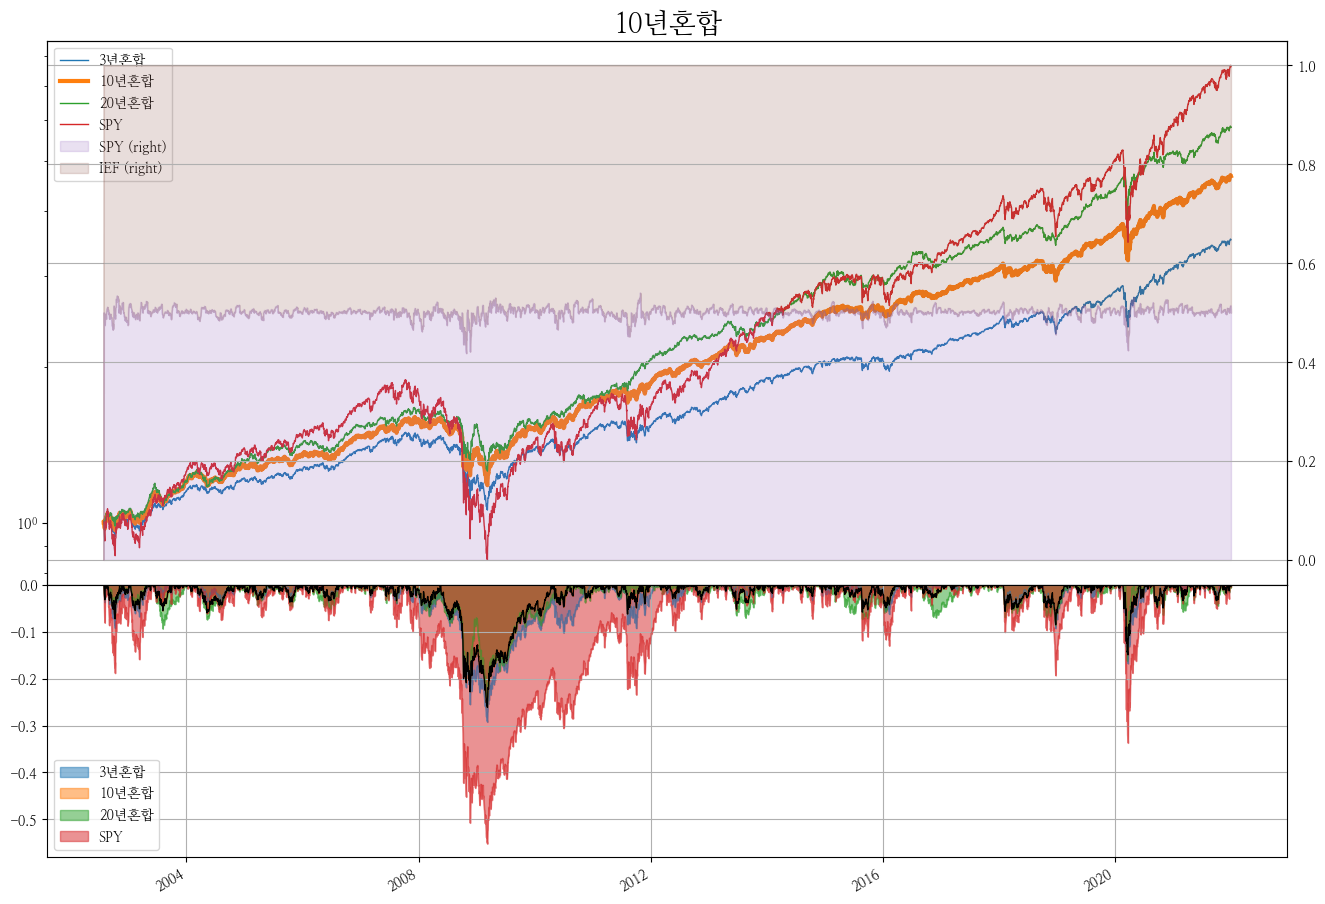

In [15]:
plot_assets(r_all, '2002', '2021', '10년혼합')

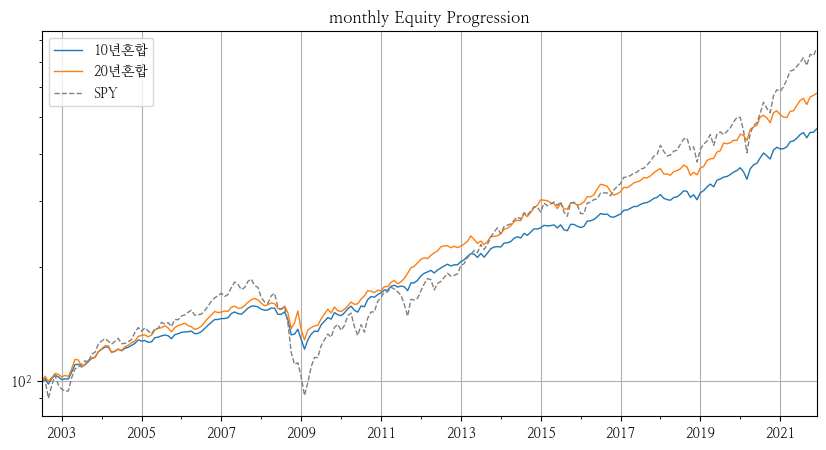

In [17]:
r = bt.run(bt_spy_ief, bt_spy_tlt)
r_spy = bt.run(bt_spy)
ax1 = r.plot(freq='M', logy=True, figsize=(10,5));
r_spy.plot(freq='M', ls='--', ax=ax1, color='grey', logy=True, figsize=(10,5));

2022-01-12 00:00:00
2021-01-12 00:00:00
-26.12011451652122 22.168897659395114


,cagr,mdd
count,4900.000,4900.000
mean,9.522,-17.362
std,4.715,6.705
min,-38.752,-26.120
25%,8.116,-26.120
50%,9.324,-14.936
75%,10.290,-14.936
max,271.006,0.000


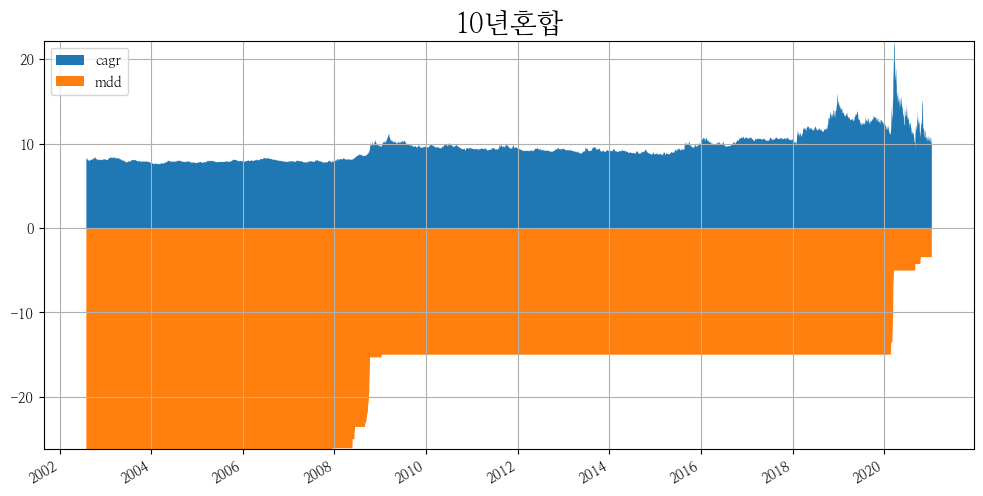

In [18]:
cm = 투자진입시점별CAGRMDD(bt_spy_ief, "10년혼합")
cm.describe()

2022-01-12 00:00:00
2021-01-12 00:00:00
-24.674806199071607 22.73900398820001


,cagr,mdd
count,4900.000,4900.000
mean,10.658,-17.834
std,5.258,5.557
min,-48.595,-24.675
25%,9.285,-24.675
50%,10.637,-16.280
75%,11.524,-16.280
max,281.730,-0.053


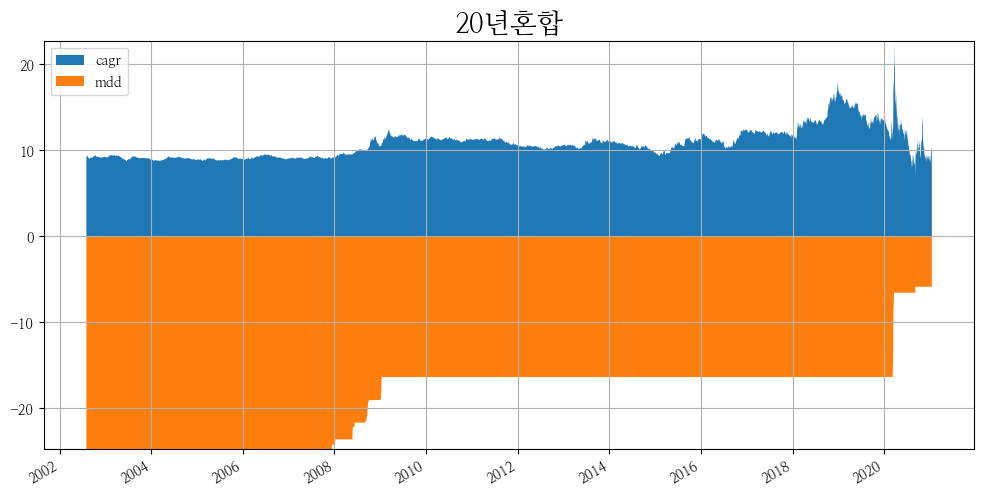

In [19]:
cm = 투자진입시점별CAGRMDD(bt_spy_tlt, "20년혼합")
cm.describe()